In [2]:
import pandas as pd

In [3]:
import numpy as np

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
miles_decomp_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [7]:
miles_decomp_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [8]:
miles_decomp_df.index=miles_decomp_df['Month']

In [9]:
result =seasonal_decompose(miles_decomp_df['MilesMM'],model='additive')

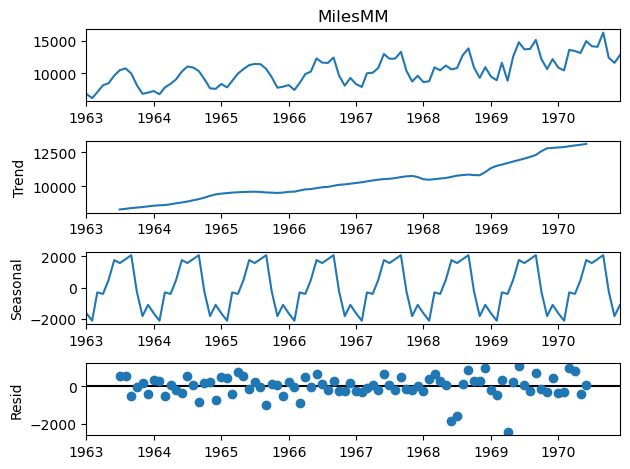

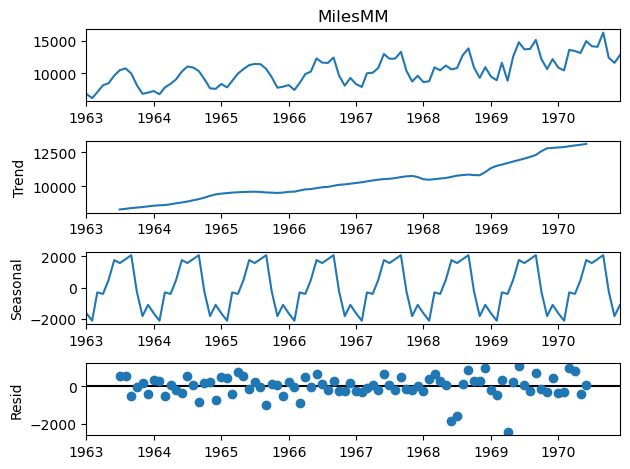

In [10]:
result.plot()

In [11]:
result2 = seasonal_decompose(miles_decomp_df['MilesMM'], model='multiplicative')

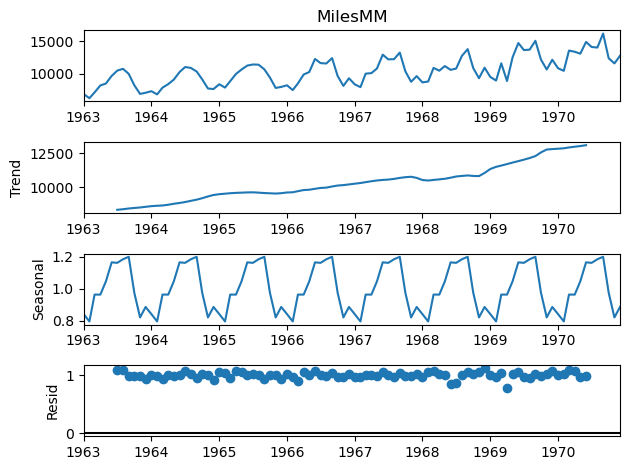

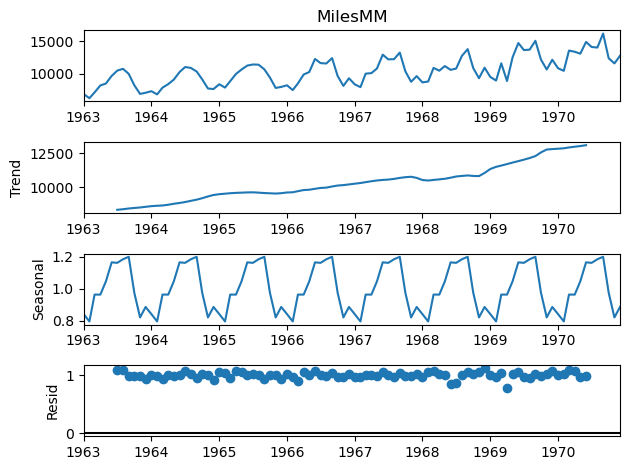

In [12]:
result2.plot()

In [13]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [14]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [15]:
miles_df['lag1']=miles_df['MilesMM'].shift(1)

In [16]:
miles_df['MilesMM_diff_1'] = miles_df['MilesMM'].diff(periods=1)

In [17]:
miles_df.head()

,Month,MilesMM,lag1,MilesMM_diff_1
0,1963-01-01,6827,NaN,NaN
1,1963-02-01,6178,6827.0,-649.0
2,1963-03-01,7084,6178.0,906.0
3,1963-04-01,8162,7084.0,1078.0
4,1963-05-01,8462,8162.0,300.0


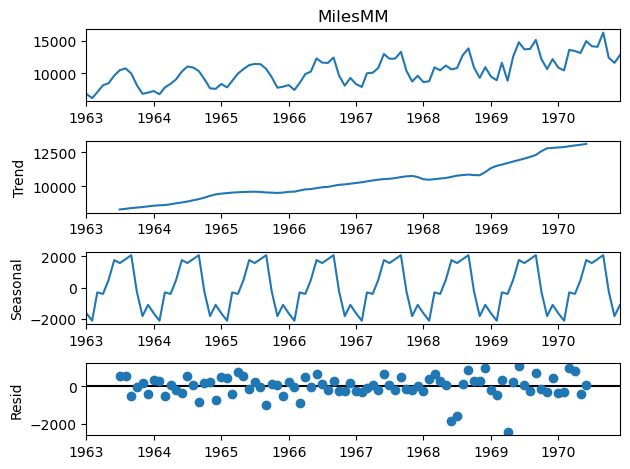

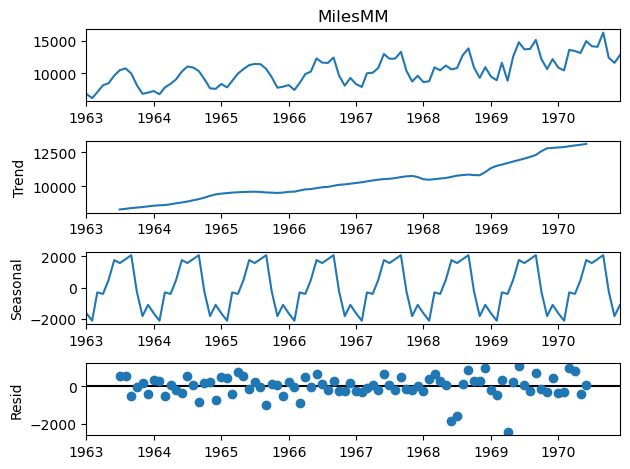

In [18]:
miles_df.index = miles_df['Month'] 
result_a = seasonal_decompose(miles_df['MilesMM'], model='additive')
result_a.plot()

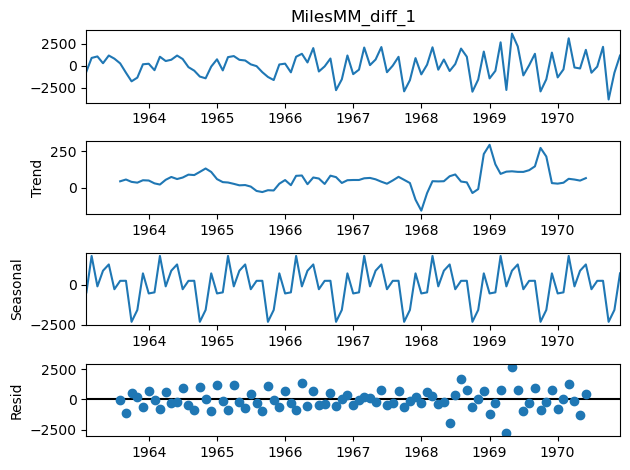

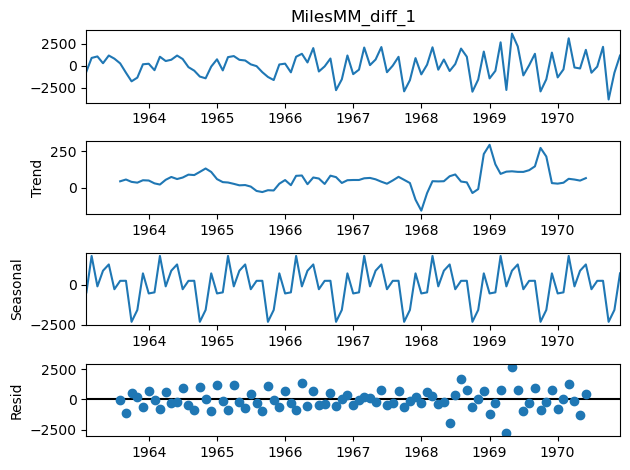

In [19]:
miles_df.index = miles_df['Month'] 
result_b = seasonal_decompose(miles_df.iloc[1:,3], model='additive')
result_b.plot()

<AxesSubplot:xlabel='Month'>

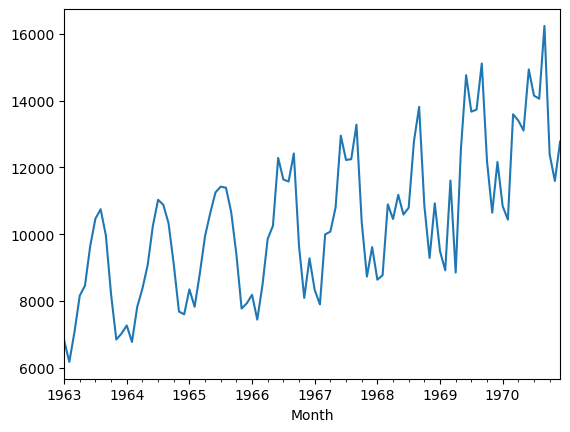

In [20]:
miles_df['MilesMM'].plot()

In [21]:
miles_df['MilesMM_diff_12'] = miles_df['MilesMM_diff_1'].diff(periods=12)

<AxesSubplot:xlabel='Month'>

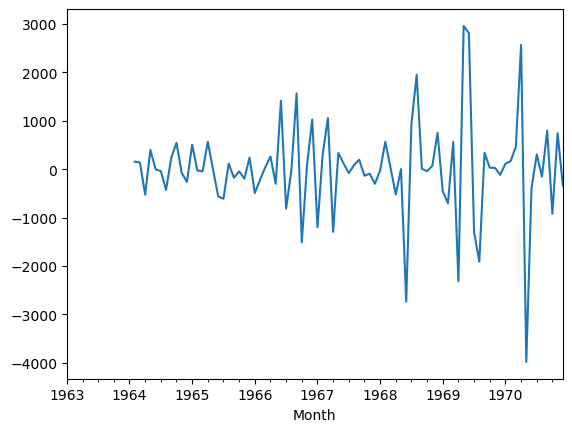

In [22]:
miles_df['MilesMM_diff_12'].plot() 

In [24]:
##TEST train split

In [26]:
temp_df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

D:\anaconda\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '13-01-1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
D:\anaconda\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '14-01-1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
D:\anaconda\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '15-01-1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
D:\anaconda\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '16-01-1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
D:\anaconda\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning

In [27]:
temp_df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-02-01,17.9
2,1981-03-01,18.8
3,1981-04-01,14.6
4,1981-05-01,15.8


In [28]:
temp_df.tail()

,Date,Temp
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0


In [29]:
temp_df.shape


(3650, 2)

In [30]:
temp_df.shape[0]

3650

In [31]:
train_size=int(temp_df.shape[0]*0.8)

In [32]:
train_size

2920

In [33]:
train=temp_df[0:train_size]

In [34]:
test=temp_df[train_size:]

In [35]:
train.shape

(2920, 2)

In [36]:
test.shape

(730, 2)

In [42]:
import pandas as pd

In [43]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

D:\anaconda\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '13-01-1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
D:\anaconda\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '14-01-1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
D:\anaconda\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '15-01-1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
D:\anaconda\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '16-01-1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
D:\anaconda\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning

In [44]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-02-01,17.9
2,1981-03-01,18.8
3,1981-04-01,14.6
4,1981-05-01,15.8


In [45]:
df['t']=df['Temp'].shift(1)

In [46]:
df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-02-01,17.9,20.7
2,1981-03-01,18.8,17.9
3,1981-04-01,14.6,18.8
4,1981-05-01,15.8,14.6


In [47]:
train,test=df[1:df.shape[0]-7],df[df.shape[0]-7:]

In [49]:
train.head(10)

,Date,Temp,t
1,1981-02-01,17.9,20.7
2,1981-03-01,18.8,17.9
3,1981-04-01,14.6,18.8
4,1981-05-01,15.8,14.6
5,1981-06-01,15.8,15.8
6,1981-07-01,15.8,15.8
7,1981-08-01,17.4,15.8
8,1981-09-01,21.8,17.4
9,1981-10-01,20.0,21.8
10,1981-11-01,16.2,20.0


In [59]:
train_X,train_y=train['t'],train['Temp']
test_X,test_y=test['t'],test['Temp']

In [60]:
#sdgudghdsbfd

In [52]:
#walk forward validation

In [53]:
predictions=test_X.copy()

In [55]:
print(predictions)


3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64


In [61]:
print(test_y)

3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [62]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test_y,predictions)
mse

3.4228571428571413

In [63]:
from matplotlib import pyplot

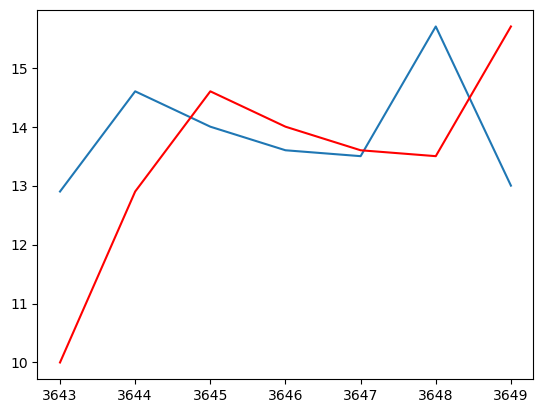

In [66]:
pyplot.plot(test_y)
pyplot.plot(predictions,color='red')

In [67]:
#Autoregression Model

In [68]:
df=pd.read_csv('daily-min-temperatures.csv',header=0,parse_dates=[0])

D:\anaconda\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '13-01-1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
D:\anaconda\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '14-01-1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
D:\anaconda\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '15-01-1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
D:\anaconda\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '16-01-1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
D:\anaconda\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning

In [70]:
train,test=df.Temp[1:df.shape[0]-7],df.Temp[df.shape[0]-7:]

In [71]:
train.head()

1    17.9
2    18.8
3    14.6
4    15.8
5    15.8
Name: Temp, dtype: float64

In [84]:
from statsmodels.tsa.ar_model.AutoReg import AR

ModuleNotFoundError: No module named 'statsmodels.tsa.ar_model.AutoReg'; 'statsmodels.tsa.ar_model' is not a package

In [81]:
model=AR(train)
model_fit=model.fit()

NotImplementedError: AR has been removed from statsmodels and replaced with statsmodels.tsa.ar_model.AutoReg.

In [85]:
model_fit.k_ar

NameError: name 'model_fit' is not defined

In [86]:
model_fit.params

NameError: name 'model_fit' is not defined